# Age Estimation and Gender Classification

In this assignment, you will train CNN models to estimate a person's age and predict their gender based on face images. Please read carefully all the instructions before you start to write your code.

**Your Tasks**

You are supposed to train two CNN models.
- Model A: Train a CNN model from scratch, following a few restrictions. Save this model as `age_gender_A.keras`
- Model B: Fine-tune a pre-trained model to perform the same task. Save this model as `age_gender_B.keras`

**Dataset**

Your models will be trained and validated on a folder `train_val/` containing 5,000 labeled face images (size: 128 x 128), originated from the UTKFace dataset. During the assessment phase, your code will be tested on unseen test data.

**Performance Metric**

The evaluation of your models on the test set will be based on the following metrics:
- age estimation: - Mean Absolute Error (MAE)
- gender prediction: accuracy

**GPU Time Management**

Please use the available GPU time wisely, as there are some limitations on free GPU usage. It is said the users can use up to 12 hours in row in Google Colab. But many people found they reached its limit far less than 12 hours. To minimize the risk of reaching the limit, consider the following suggestions:
1. Ensure you have a stable internet connection.
2. Carefully validate your hyperparameters before starting the training process.
3. Based on past experience, each model should be trained in less than 2 hours. If the training time is significantly longer, you may need to adjust your model architecture.


## Setting Up: Mount the google drive
Mount your google drive to the notebook. Also don't forget to **enable GPU** before your training.


In [1]:
#
# Add your code here
#
# Add your code here
#
# Add your code here
from google.colab import drive
drive.mount('/content/drive')
#
#
#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Visualize a few photos
It's always beneficial to thoroughly understand your data before beginning the training process. To get a first-hand impression of the dataset, please display a minimum of 20 images from the `train_val/` folder, along with their corresponding age and gender labels. This will help you gain initial insights into the dataset.

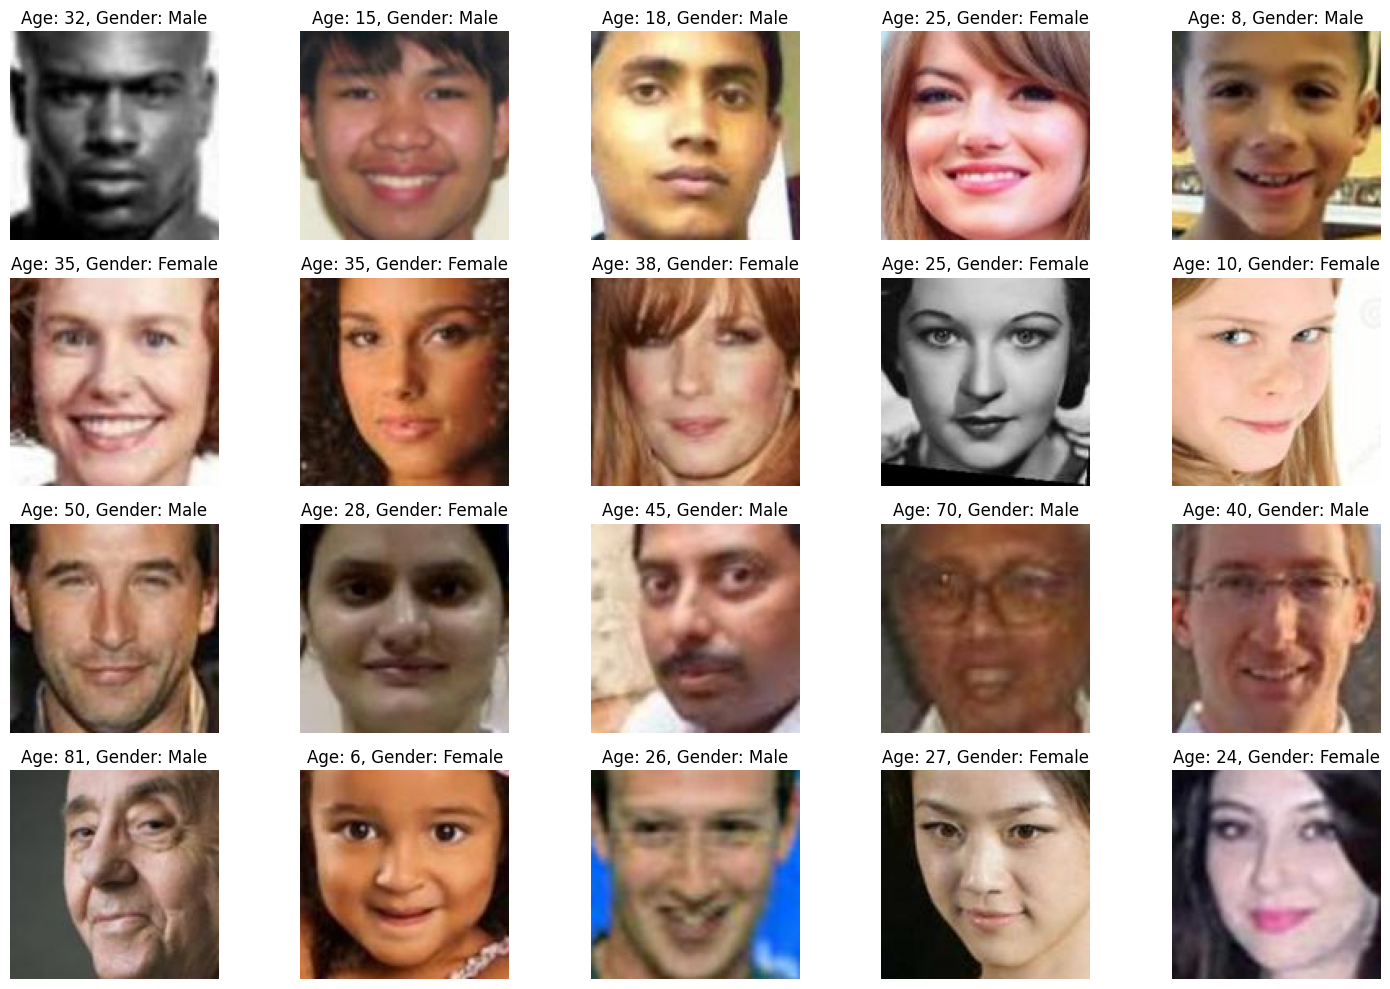

In [2]:
#
# Add your code here
#
# Add your code here
#
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
# Add your code here
data_dir = '/content/drive/MyDrive/MLCW/train_val'

# List all files in the directory
#image_files = os.listdir(data_dir)
# Get a set of unique extensions from the files
#extensions = set(os.path.splitext(f)[1].lower() for f in files)
# Print the extensions found
#print("Found the following image extensions:", extensions)

# Get a list of all .jpg image filenames in the folder
image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]

# Randomly select 20 images
random_images = random.sample(image_files, 20)

# Filter out first 20 images for visualization
#selected_files = image_files[:40]

# Set up the plot
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.ravel()

for i, filename in enumerate(random_images):
    # Extract age and gender from the file name
    age, gender, _, _ = filename.split('_')
    gender = 'Male' if gender == '0' else 'Female'

    # Load and display the image
    img = plt.imread(os.path.join(data_dir, filename))
    axes[i].imshow(img)
    axes[i].set_title(f'Age: {age}, Gender: {gender}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#
#
#

## Step 1: Data Pre-Processing
In this step, you will perform necessary pre-processing tasks before feeding the data into a CNN. The pre-processing includes:

1. Splitting the data into training and validation sets.
2. Loading image data, gender labels and age values, and rescaling pixel values (originally integers between 0 and 255) to the range [0, 1].
3. Data augmentation

The first two pre-processing steps have already been completed for you. Your task in this step is limited to:

3. Data augmentation

Please note:

- Do not modify any part of the provided code except the section marked with ########.
- Do not rescale the age values to the range [0,1], as the original values are used during the testing stage. Rescaling them would significantly impact testing performance.



Number of images for training: 4000
Number of images for validation: 1000
load all image data, age and gender labels...
load all image data, age and gender labels...


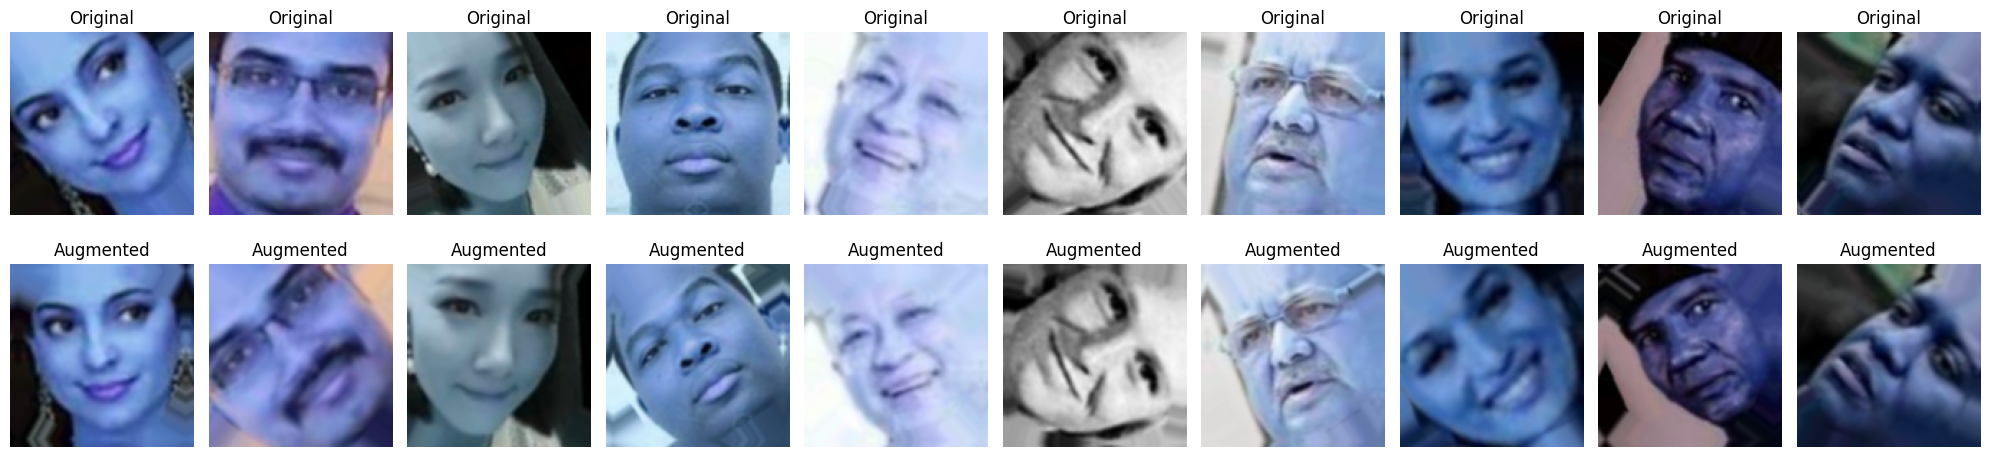

In [3]:
import os
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomFlip, RandomTranslation

folder_train_val = '/content/drive/MyDrive/MLCW/train_val'
all_image_files = [file for file in os.listdir(folder_train_val) if file.lower().endswith(('.jpg'))]

# Shuffle the dataset to ensure random distribution
random.seed(0)  # Ensure reproducibility
random.shuffle(all_image_files)

# Calculate the number of images for each set
n_train_val = len(all_image_files)
train_end = int(n_train_val * 0.8)

# Split the dataset
train_image_files = all_image_files[:train_end]
val_image_files = all_image_files[train_end:]
print(f"Number of images for training: {len(train_image_files)}")
print(f"Number of images for validation: {len(val_image_files)}")

def load_imgs_lables(dataset_path,filenames):
  print('load all image data, age and gender labels...')
  images = []
  age_labels = []
  gender_labels = []
  for current_file_name in filenames:
    img = cv2.imread(os.path.join(dataset_path, current_file_name))
    img = img / 255.0  # Normalize pixel values
    labels = current_file_name.split('_')
    age_label = int(labels[0])
    gender_label = int(labels[1])
    age_labels.append(age_label)
    gender_labels.append(gender_label)
    images.append(img)

  # Convert to NumPy arrays
  images = np.array(images)
  age_labels = np.array(age_labels)
  gender_labels = np.array(gender_labels)
  return images, age_labels, gender_labels

# load data from the training set
train_images, train_age, train_gender = load_imgs_lables(folder_train_val,train_image_files)

# load data from the validation set
val_images, val_age, val_gender = load_imgs_lables(folder_train_val,val_image_files)

#
######### Add your code for data augmentation here #########
# Define the data augmentation pipeline using Sequential
data_augmentation = Sequential([
    RandomRotation(0.15, fill_mode = 'nearest'),
    RandomZoom(0.1),
    RandomFlip("horizantal"),
    #RandomTranslation(0.2, 0.2)
])

# Apply augmentation to training images
train_images = data_augmentation(train_images)

# Select random images for augmentation
num_images = 10
random_indices = np.random.choice(len(train_images), num_images, replace=False)
train_images_np = train_images.numpy()  # Convert to NumPy
sample_images = train_images_np[random_indices]  # Now indexing works


# Apply augmentation to the selected images
sample_augmented_images = data_augmentation(sample_images)

# Plot original and augmented images
fig, axes = plt.subplots(2, num_images, figsize=(20, 5))
for i in range(num_images):
    # Original images
    axes[0, i].imshow(sample_images[i])
    axes[0, i].axis('off')
    axes[0, i].set_title("Original")

    # Augmented images
    axes[1, i].imshow(sample_augmented_images[i].numpy())  # Convert tensor to NumPy
    axes[1, i].axis('off')
    axes[1, i].set_title("Augmented")

plt.tight_layout()
plt.show()
#

## STEP2A: Build your own CNN network
In this step, you will define your own CNN model for identifying gender and predicting age. Although there are two tasks, you only need to build one CNN model with two outputs. You may refer to online resources for solutions.

Here are the key requirements and restrictions for your network:
1.	The input size must be 128 x 128 x 3, which means you **should not resize** the original images. This is because my test code relies on this particular input size. Any other size will cause problem in the testing stage.
2.  Please treat the gender classification as a binary problem, i.e., **the output layer for the gender branch has only 1 unit**, instead of 2. Although it is technically correct to treat gender classification as a multi-class problem with 2 classes, i.e., 2 units in the last layer, the test code only supports a 1-unit last-layer configuration for the gender branch.
3.	The size of feature maps being fed to the first fully connected layer must be less than 10 x 10, while there is no number limitation about the depth.
4.	Incorporate techniques to prevent overfitting as appropriate.

At the end of your implementation, use `modelA.summary()` to display the model architecture and use `plot_model()` to visualize the architecture.

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 128, 128, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 126, 126, 32)   │            896 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 30, 30, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 12, 12, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 3, 3, 256)      │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 2304)           │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        295,040 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender_output (Dense)     │ (None, 1)              │            129 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_output (Dense)        │ (None, 1)              │            129 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 683,714 (2.61 MB)

 Trainable params: 683,714 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

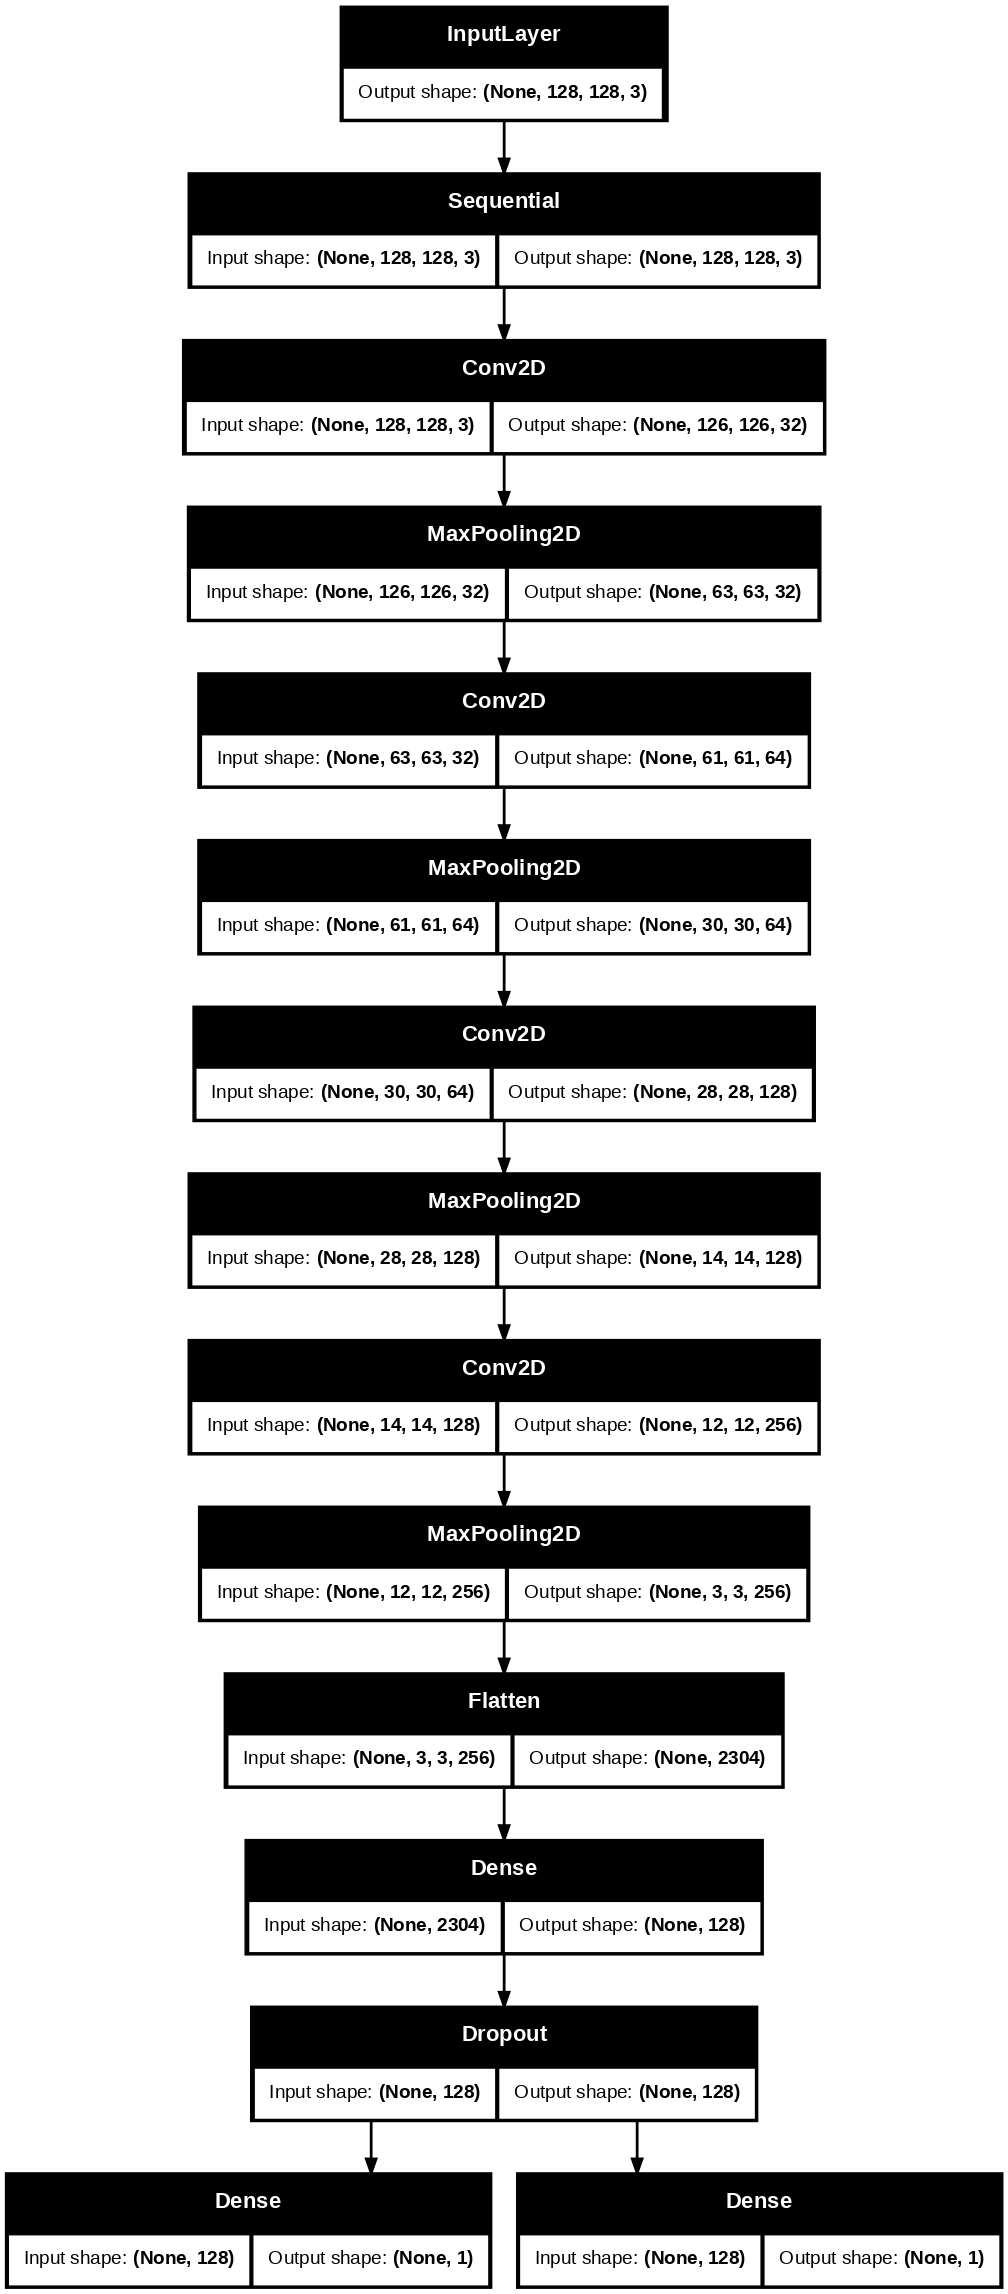

In [4]:

# Add your code here
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
# Define the multi-task CNN model with improvements
def create_multi_task_cnn():
    input_layer = Input(shape=(128, 128, 3))  # 128x128x3 input
    x = data_augmentation(input_layer)
    # Convolutional and Pooling Layers
    x = Conv2D(32, (3, 3), activation='relu')(x)  # 128x128x32
    #x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)  # 64x64x32

    x = Conv2D(64, (3, 3), activation='relu')(x)  # 64x64x64
    #x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)  # 32x32x64

    x = Conv2D(128, (3, 3), activation='relu')(x)  # 32x32x128
    #x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)  # 16x16x128

    x = Conv2D(256, (3, 3), activation='relu')(x)  # 16x16x256
   # x = BatchNormalization()(x)
    x = MaxPooling2D((4, 4))(x)  # 4x4x256 (<10x10 requirement)

    # Flatten for fully connected layers
    x = Flatten()(x)  # 4x4x256 = 4096 units

    # Shared dense layer with stronger regularization
    x = Dense(128, activation='relu')(x)  # Reduced units
    #x = BatchNormalization()(x)
    x = Dropout(0.1)(x)  # Increased dropout

    # Gender branch (binary classification)
    gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)  # 1 unit

    # Age branch (regression)
    age_output = Dense(1, activation='linear', name='age_output')(x)  # Linear output

    # Define Model
    return Model(inputs=input_layer, outputs=[gender_output, age_output])

# Create the model
modelA = create_multi_task_cnn()

modelA.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelA, show_shapes=True,dpi=100)


## STEP3A: Compile and train your model
Compile and train your model here.
Save your model by `modelA.save(your_model_folder+"age_gender_A.keras")` after training.

**DON'T use any other name for your model file.** This is because my test code relies on this particular model name. Any other file name will cause problem in the testing stage.

**Save the model with `save()`** to save the entire model (including a model's architecture, weights, and training configuration) as a `.keras` zip archive. Don't save it with `save_weights()`.


In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


from keras.callbacks import ModelCheckpoint



modelA.compile(optimizer=Adam(learning_rate=0.001),
               loss={'age_output': 'mae', 'gender_output': 'binary_crossentropy'},
               #loss_weights={'age_output': 0.6, 'gender_output': 1.4},
               # Higher weight for gender....87% gives better for gender
                loss_weights={'age_output': 0.7, 'gender_output': 1.5},
               metrics={'age_output': ['mae'], 'gender_output': ['accuracy']})


#modelA.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

#fixed

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.001, verbose=1)
#early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

history = modelA.fit(
    train_images,
    {'age_output': train_age, 'gender_output': train_gender},
    epochs=100,batch_size = 32,
    validation_data=(val_images, {'age_output': val_age, 'gender_output': val_gender}),
    callbacks=[reduce_lr]
)
# Save the Model
folder_models = "/content/drive/MyDrive/MLCW/"
modelA.save(folder_models+'age_gender_A.keras')

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - age_output_loss: 18.7681 - age_output_mae: 18.7681 - gender_output_accuracy: 0.4989 - gender_output_loss: 0.9302 - loss: 14.5330 - val_age_output_loss: 16.1084 - val_age_output_mae: 16.1264 - val_gender_output_accuracy: 0.5510 - val_gender_output_loss: 0.6738 - val_loss: 12.2998 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - age_output_loss: 15.5260 - age_output_mae: 15.5260 - gender_output_accuracy: 0.5011 - gender_output_loss: 0.8116 - loss: 12.0856 - val_age_output_loss: 15.4560 - val_age_output_mae: 15.4920 - val_gender_output_accuracy: 0.5420 - val_gender_output_loss: 0.6743 - val_loss: 11.8571 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - age_output_loss: 15.0361 - age_output_mae: 15.0361 - gender_output_accuracy: 0.5182 - gender_output_loss: 0.7634 - loss: 11.6704 - val_age_output_loss: 15.5812 - val_age_output_mae: 15.5902 - val_gender_output_accuracy: 0.68

## STEP4A: Draw the learning curves
Draw four learning curve figures for model A as follows.
1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set

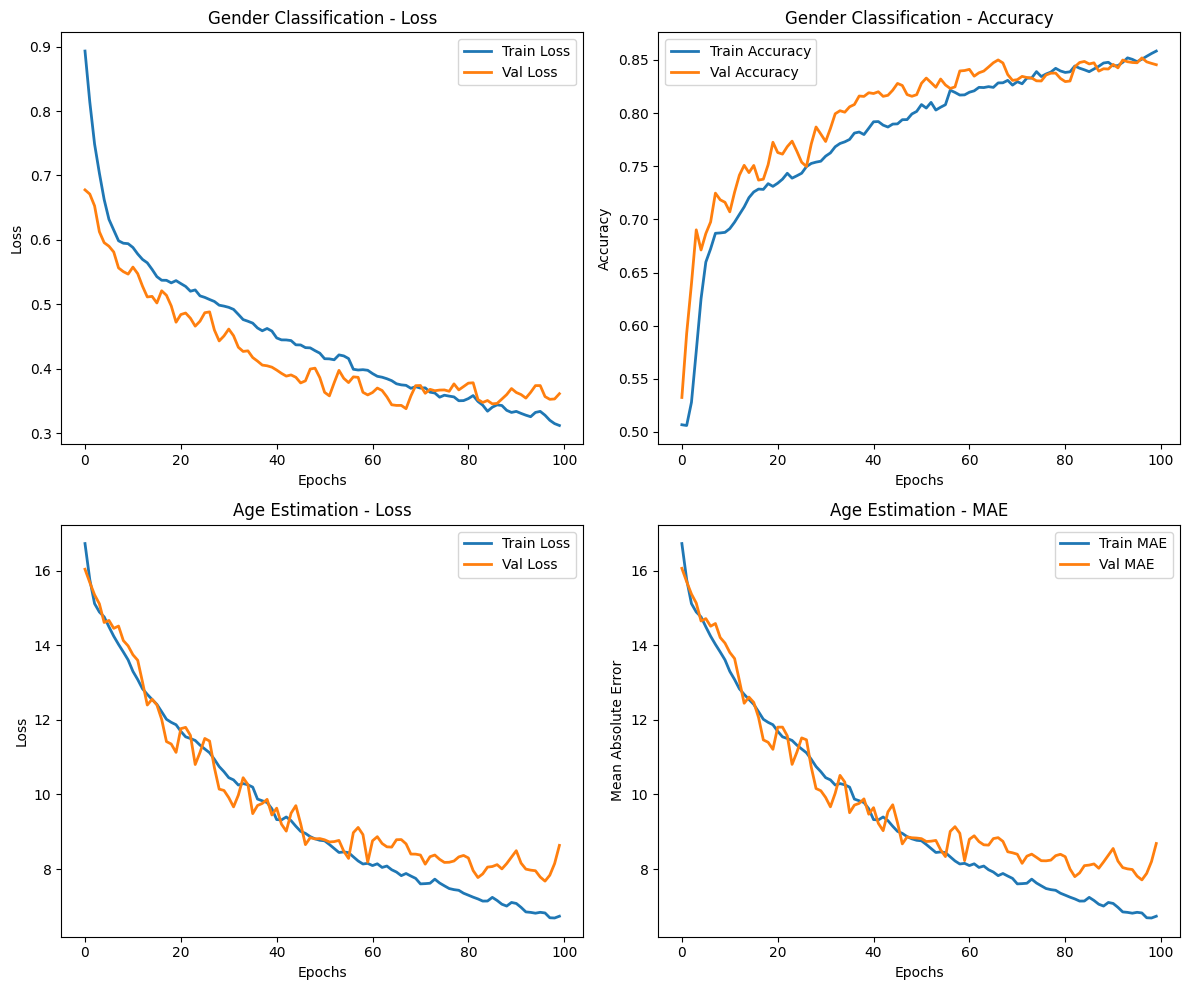

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

def smooth_curve(data, window=5, poly=2):
    """Apply Savitzky-Golay filter to smooth the curve."""
    if len(data) < window:
        return data  # Avoid applying filter if data is too short
    return savgol_filter(data, window, poly)

plt.figure(figsize=(12, 10))

# Gender Classification Loss
plt.subplot(2, 2, 1)
plt.plot(smooth_curve(history.history['gender_output_loss']), label='Train Loss', linewidth=2)
plt.plot(smooth_curve(history.history['val_gender_output_loss']), label='Val Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Gender Classification - Loss')

# Gender Classification Accuracy
plt.subplot(2, 2, 2)
plt.plot(smooth_curve(history.history['gender_output_accuracy']), label='Train Accuracy', linewidth=2)
plt.plot(smooth_curve(history.history['val_gender_output_accuracy']), label='Val Accuracy', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Gender Classification - Accuracy')

# Age Estimation Loss
plt.subplot(2, 2, 3)
plt.plot(smooth_curve(history.history['age_output_loss']), label='Train Loss', linewidth=2)
plt.plot(smooth_curve(history.history['val_age_output_loss']), label='Val Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Age Estimation - Loss')

# Age Estimation MAE
plt.subplot(2, 2, 4)
plt.plot(smooth_curve(history.history['age_output_mae']), label='Train MAE', linewidth=2)
plt.plot(smooth_curve(history.history['val_age_output_mae']), label='Val MAE', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Age Estimation - MAE')

plt.tight_layout()
plt.show()


## STEP2B: Build a CNN network based on a pre-trained model
Choose an existing CNN architecture pre-trained on ImageNet and fine-tune it on this dataset.

As with Model A, **do not resize the input image size**.
Ensure that the output layer for **the gender branch has only 1 unit**.

At the end of the cell, use `modelB.summary()` to display the model architecture and use `plot_model()` to visualize the architecture.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 128, 128, 64)   │          1,792 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 128, 128, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 64, 64, 64)     │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 64, 64, 128)    │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 64, 64, 128)    │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 32, 32, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 32, 32, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 16, 16, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 16, 16, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 8, 8, 512)      │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 8, 8, 512)      │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 8, 8, 512)      │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 16,846,786 (64.27 MB)

 Trainable params: 2,131,330 (8.13 MB)

 Non-trainable params: 14,715,456 (56.14 MB)

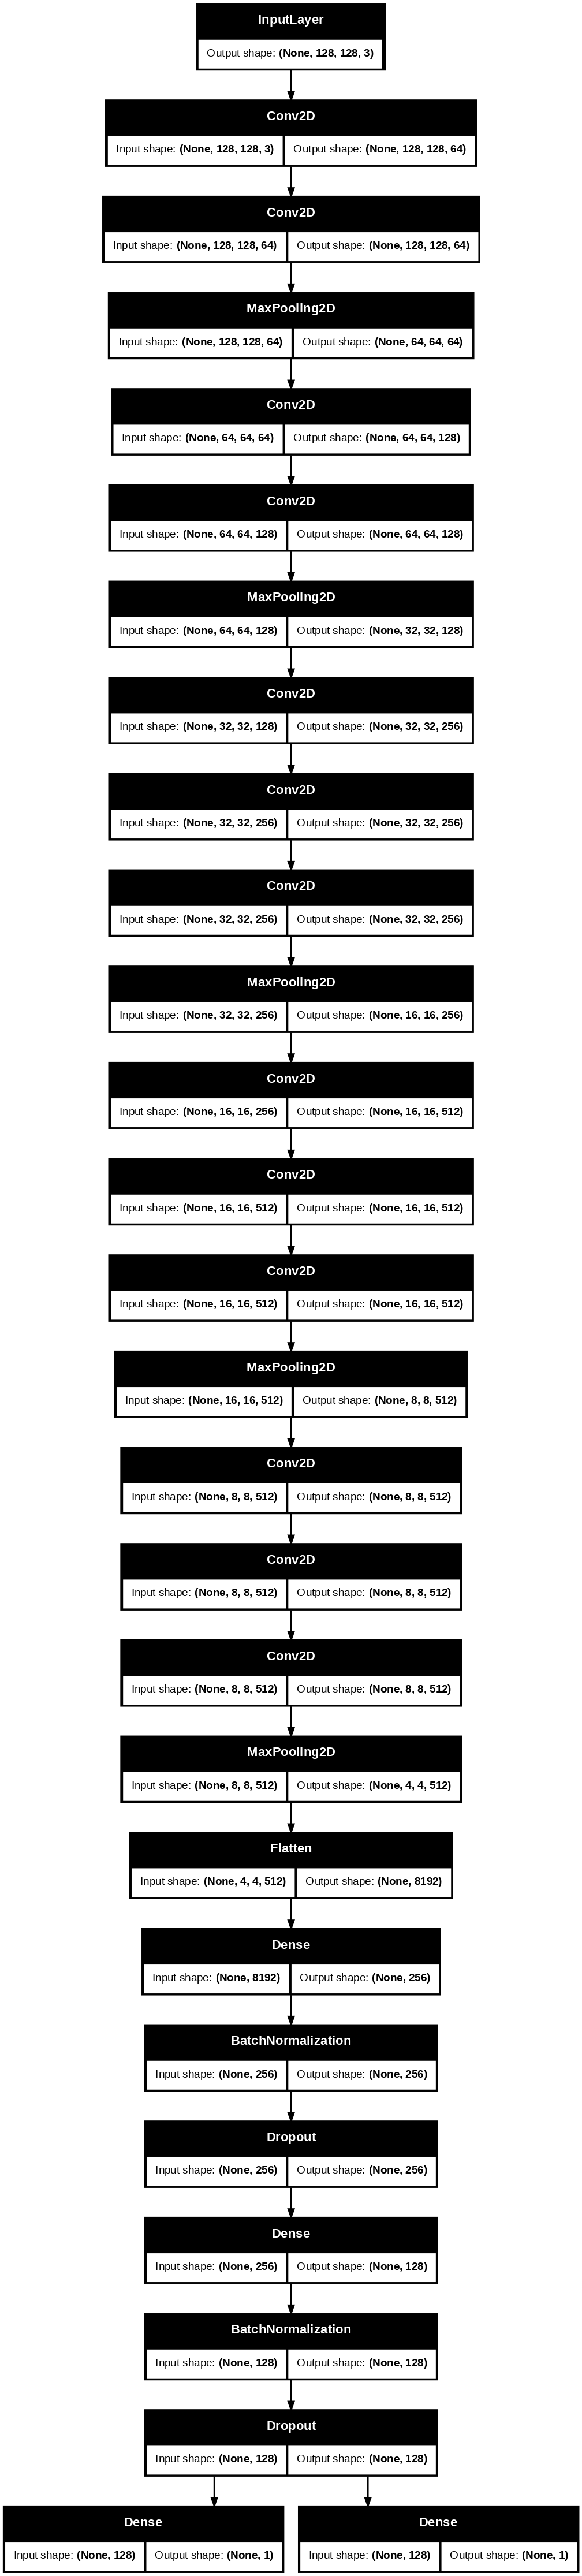

In [7]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Load Pre-trained VGG16 Model (Feature Extractor)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze all layers initially

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Output Layers
age_output = Dense(1, activation='linear', name='age_output')(x)  # Regression
gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)  # Classification

# Define Model
modelB = Model(inputs=base_model.input, outputs=[age_output, gender_output])

modelB.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelB, show_shapes=True,dpi=100)



## STEP3B: Compile and train your model
Compile and train your model here.
Save your model to `age_gender_B.keras` after training.

**DON'T use any other name for your model file.** This is because my test code relies on this particular model name. Any other file name will cause problem in the testing stage.

**Also, save the model with `save()` instead of `save_weights()`.**


In [8]:
# Compile the Model (Single Compilation Step)
modelB.compile(
    optimizer=Adam(learning_rate=0.001),  # Higher LR initially
    loss={'age_output': 'mae', 'gender_output': 'binary_crossentropy'},
    metrics={'age_output': 'mae', 'gender_output': 'accuracy'}
)

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# Train Model (Feature Extraction Phase)
history = modelB.fit(
    train_images, {'age_output': train_age, 'gender_output': train_gender},
    validation_data=(val_images, {'age_output': val_age, 'gender_output': val_gender}),
    epochs=100,   # Train first with frozen layers
    batch_size=16,
    callbacks=[lr_scheduler, checkpoint, early_stopping],
    verbose=1
)

# Unfreeze Last Few Layers (Fine-Tuning)
for layer in base_model.layers[-10:]:  # Unfreezing last 8 layers
    layer.trainable = True

# Reduce Learning Rate for Fine-Tuning Without Recompiling
modelB.optimizer.learning_rate.assign(0.0001)

# Continue Training (Fine-Tuning Phase)
history_finetune = modelB.fit(
    train_images, {'age_output': train_age, 'gender_output': train_gender},
    validation_data=(val_images, {'age_output': val_age, 'gender_output': val_gender}),
    epochs=50,  # Fine-tuning with unfrozen layers
    batch_size=16,
    callbacks=[lr_scheduler, checkpoint, early_stopping],
    verbose=1
)

# Save the Model
model_folder = "/content/drive/MyDrive/MLCW/"
os.makedirs(model_folder, exist_ok=True)
modelB.save(model_folder + "age_gender_B.keras")

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - age_output_loss: 32.4682 - age_output_mae: 32.4682 - gender_output_accuracy: 0.6320 - gender_output_loss: 0.7377 - loss: 33.3545 - val_age_output_loss: 26.9034 - val_age_output_mae: 26.9388 - val_gender_output_accuracy: 0.7370 - val_gender_output_loss: 0.6015 - val_loss: 27.6637 - learning_rate: 0.0010
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - age_output_loss: 20.6914 - age_output_mae: 20.6914 - gender_output_accuracy: 0.7234 - gender_output_loss: 0.5706 - loss: 21.3866 - val_age_output_loss: 16.4309 - val_age_output_mae: 16.4760 - val_gender_output_accuracy: 0.7930 - val_gender_output_loss: 0.4489 - val_loss: 17.0473 - learning_rate: 0.0010
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - age_output_loss: 11.2039 - age_output_mae: 11.2039 - gender_output_accuracy: 0.7192 - gender_output_loss: 0.5731 - loss: 11.9048 - val_age_output_loss: 9.7517 - val_age_output_mae: 9.7403 - val_gender_output_accuracy: 0.776

## STEP4B: Draw the learning curves
Draw four learning curve figures for model B as follows.
1. The loss of the gender classification over the training and validation set
2. The accuracy of the gender classification over the training and validation set
3. The loss of the age estimation over the training and validation set
4. The MAE of the age estimation over the training and validation set

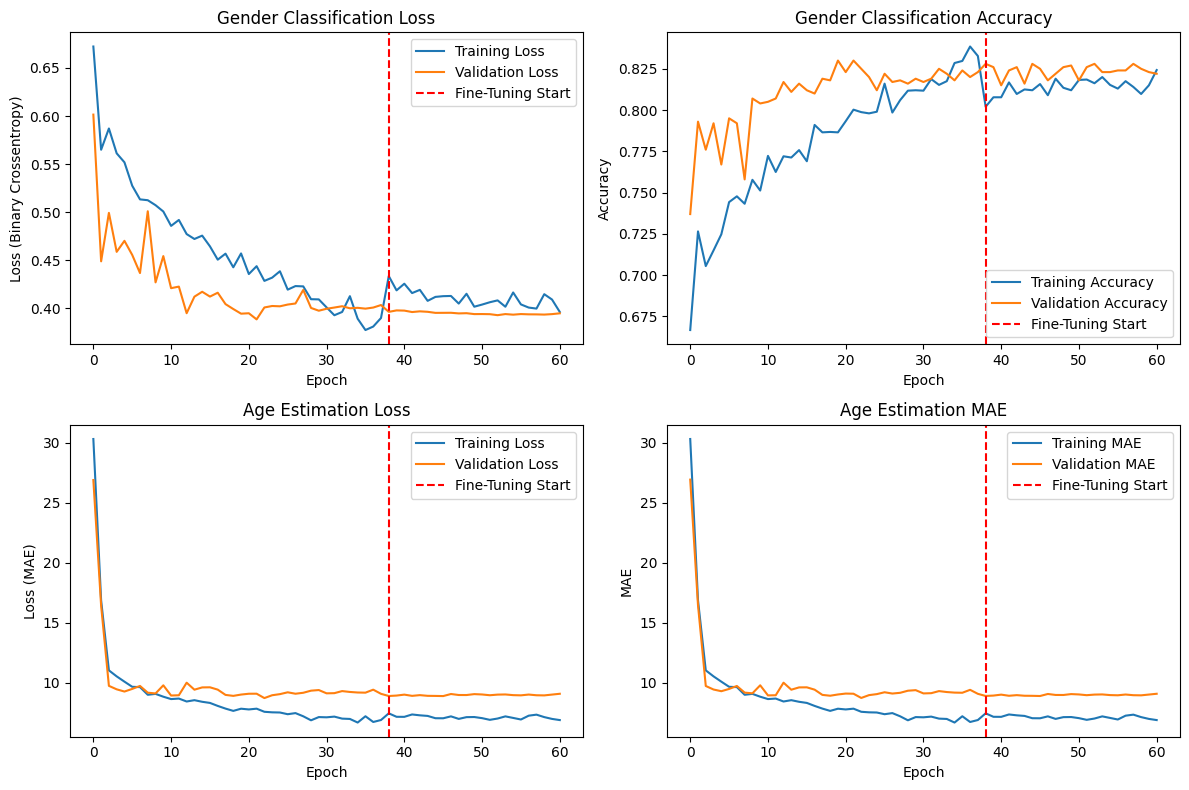

In [9]:
import matplotlib.pyplot as plt

# Track the number of epochs before fine-tuning starts
initial_epochs = len(history.epoch)  # Number of epochs before fine-tuning starts

# Merge Histories
history_dict = history.history.copy()  # Copy to avoid modifying the original
fine_tune_dict = history_finetune.history

# Extend each metric
for key in history_dict.keys():
    history_dict[key].extend(fine_tune_dict[key])

# Correct Fine-Tuning Start Epoch
fine_tune_start = initial_epochs  # Use tracked epoch instead of len(history.history['loss'])

plt.figure(figsize=(12, 8))

# Gender Classification Loss
plt.subplot(2, 2, 1)
plt.plot(history_dict['gender_output_loss'], label='Training Loss')
plt.plot(history_dict['val_gender_output_loss'], label='Validation Loss')
plt.axvline(x=fine_tune_start, color='red', linestyle='--', label='Fine-Tuning Start')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.title('Gender Classification Loss')
plt.legend()

# Gender Classification Accuracy
plt.subplot(2, 2, 2)
plt.plot(history_dict['gender_output_accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_gender_output_accuracy'], label='Validation Accuracy')
plt.axvline(x=fine_tune_start, color='red', linestyle='--', label='Fine-Tuning Start')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Gender Classification Accuracy')
plt.legend()

# Age Estimation Loss
plt.subplot(2, 2, 3)
plt.plot(history_dict['age_output_loss'], label='Training Loss')
plt.plot(history_dict['val_age_output_loss'], label='Validation Loss')
plt.axvline(x=fine_tune_start, color='red', linestyle='--', label='Fine-Tuning Start')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.title('Age Estimation Loss')
plt.legend()

# Age Estimation MAE
plt.subplot(2, 2, 4)
plt.plot(history_dict['age_output_mae'], label='Training MAE')
plt.plot(history_dict['val_age_output_mae'], label='Validation MAE')
plt.axvline(x=fine_tune_start, color='red', linestyle='--', label='Fine-Tuning Start')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Age Estimation MAE')
plt.legend()

plt.tight_layout()
plt.show()


## STEP5: Evaluate the model on the test set
I will load your two models for testing. The test set will not be available before your submission.

The metrics for measuring the performance on the test set are:
- age estimation: MAE (Mean Absolute Error)
- gender classification: accuracy


In [10]:
#
# Don't add code in this cell when submitting this file
#